Understand patterns like:

Most used words

Transcript length per comedian

Word cloud per comedian

Word frequency bar chart



In [2]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter


In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from collections import Counter


In [10]:
import pandas as pd

# Load cleaned data
df = pd.read_csv("cleaned_transcripts.csv")

# Convert stringified lists back to real Python lists (for tokens)
import ast
df['tokens'] = df['tokens'].apply(ast.literal_eval)


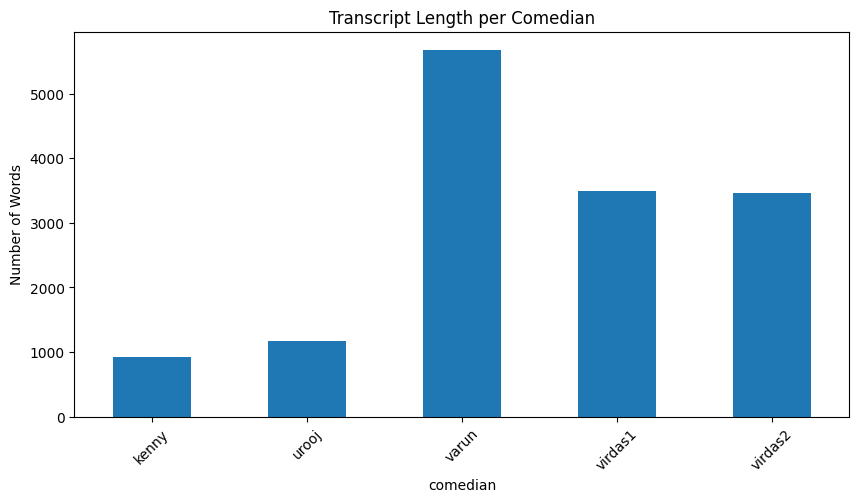

In [11]:
df['word_count'] = df['tokens'].apply(len)

# Plotting
df.plot(x='comedian', y='word_count', kind='bar', figsize=(10, 5), legend=False)
plt.ylabel("Number of Words")
plt.title("Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


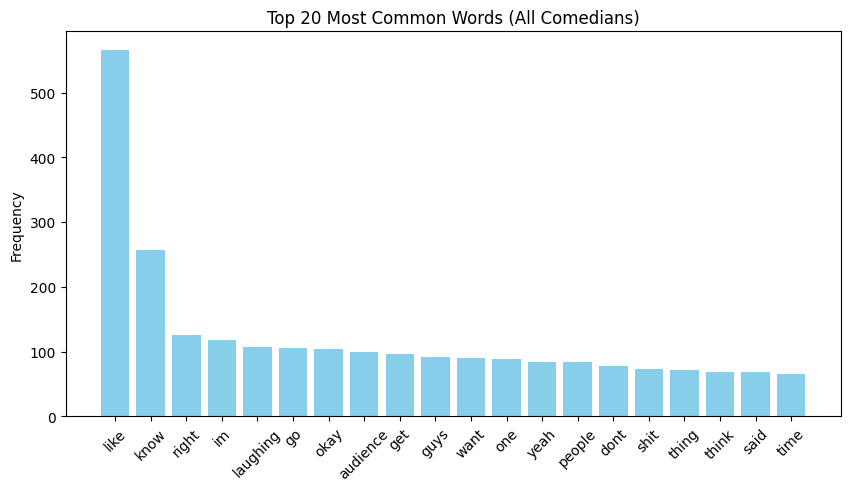

In [12]:

# Combine all tokens from all comedians
all_tokens = []
for token_list in df['tokens']:
    all_tokens.extend(token_list)

# Count top 20 most common words
top_words = Counter(all_tokens).most_common(20)

# Separate words and their counts for plotting
words, counts = zip(*top_words)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.title("Top 20 Most Common Words (All Comedians)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.show()


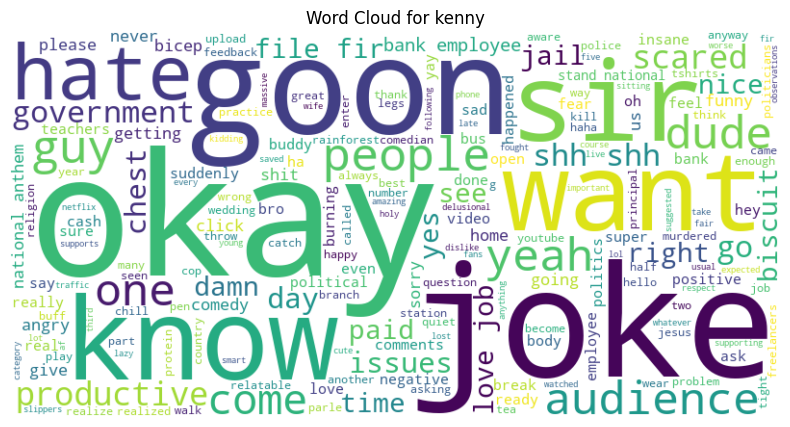

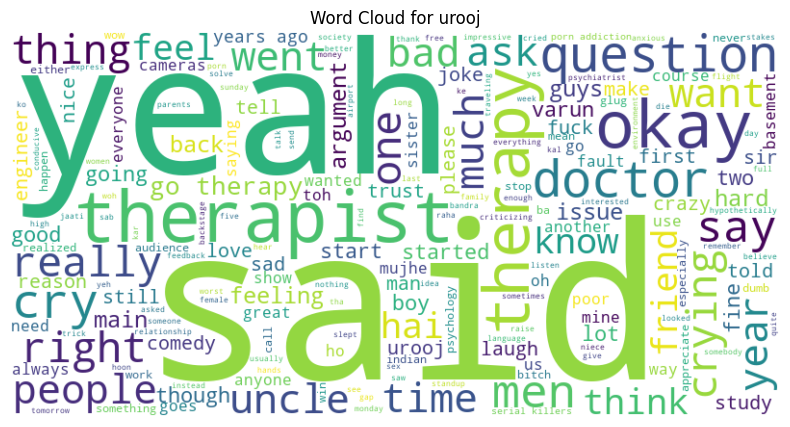

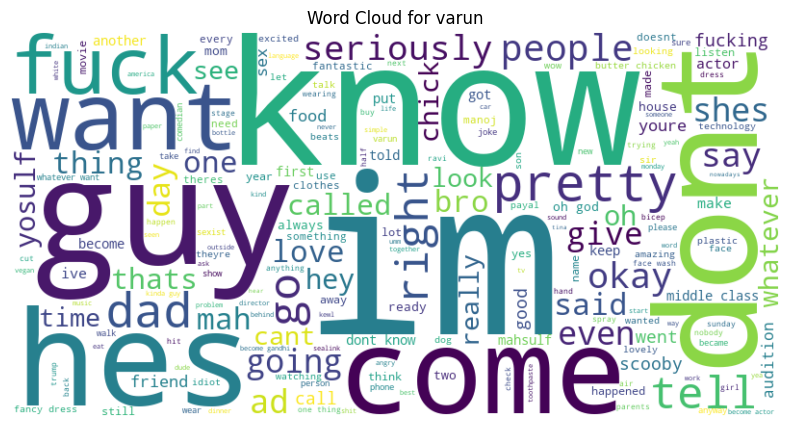

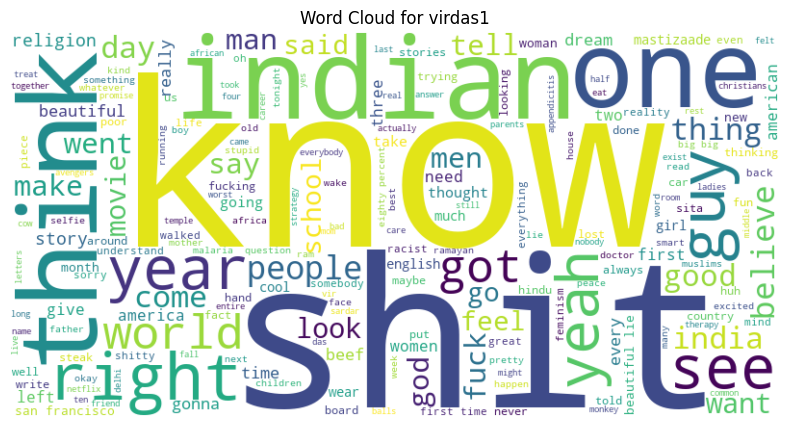

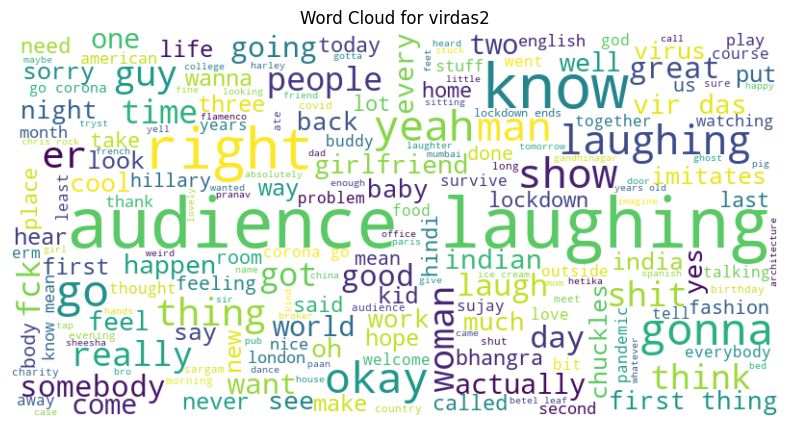

In [13]:


# Generate and display word cloud for each comedian
for comedian in df['comedian'].unique():
    # Combine all cleaned text for that comedian
    text = " ".join(df[df['comedian'] == comedian]['cleaned_text'])

    # Create word cloud
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {comedian}")
    plt.show()


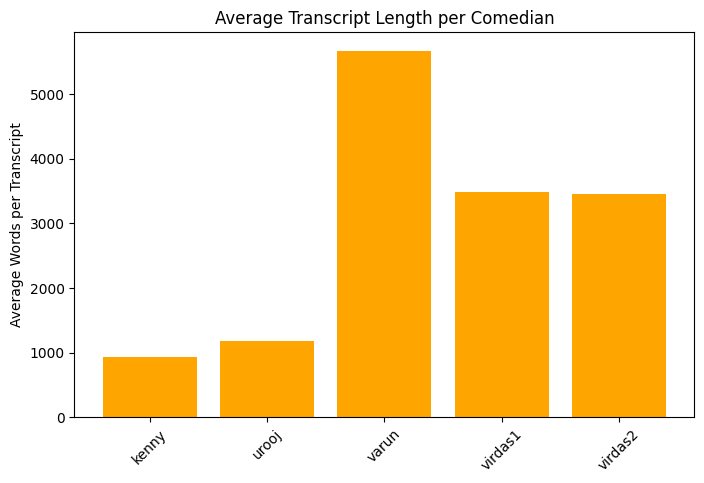

In [14]:
# Calculate average word count per comedian
avg_words = df.groupby('comedian')['word_count'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(avg_words['comedian'], avg_words['word_count'], color='orange')
plt.ylabel("Average Words per Transcript")
plt.title("Average Transcript Length per Comedian")
plt.xticks(rotation=45)
plt.show()


In [15]:
# Get unique words for each comedian
comedian_words = {}

for comedian in df['comedian'].unique():
    tokens = []
    for token_list in df[df['comedian'] == comedian]['tokens']:
        tokens.extend(token_list)
    comedian_words[comedian] = set(tokens)

# Find words unique to each comedian
for comedian in comedian_words:
    others = set().union(*(comedian_words[c] for c in comedian_words if c != comedian))
    unique_words = comedian_words[comedian] - others
    print(f"\nTop unique words used by {comedian}:\n", list(unique_words)[:15])



Top unique words used by kenny:
 ['comments', 'parle', 'buff', 'hates', 'upload', 'craving', 'socio', 'invoice', 'freaking', 'chloroform', 'biscuit', 'benefits', 'journalists', 'videos', 'ha']

Top unique words used by urooj:
 ['professor', 'born', 'psychology', 'crossed', 'feelings', 'tha', 'gap', 'logic', 'kal', 'studied', 'raha', 'jaati', 'wave', 'thorough', 'goodbye']

Top unique words used by varun:
 ['plays', 'tan', 'mosquitogoaway', 'jovi', 'jeetendras', 'fucker', 'breaking', 'celebs', 'sunglasses', 'dhoti', 'rat', 'hits', 'doggy', 'hostel', 'britney']

Top unique words used by virdas1:
 ['parks', 'std', 'historically', 'disease', 'kpmg', 'jose', 'knox', 'training', 'expired', 'batman', 'animals', 'ipads', 'heroine', 'chain', 'hatsahatsahatsa']

Top unique words used by virdas2:
 ['attend', 'highly', 'chris', 'threesome', 'forward', 'continues', 'combined', 'soundtrack', 'gotta', 'sniffs', 'device', 'chuckles', 'q', 'gig', 'survive']
